# Answer 13

In [123]:
# Output one list of [name1, num, name2], and one names list to store all names. 
with open('2015-Q13_tyler.txt') as f:
    data_lst = []
    names_lst = []
    for line in f.readlines():
        line_lst = line.split()
        if line_lst[2] == 'gain':
            data_lst.append([line_lst[0], int(line_lst[3]), line_lst[-1][:-1]])
        else:
            data_lst.append([line_lst[0], -int(line_lst[3]), line_lst[-1][:-1]])
        names_lst.append(line_lst[0])
    names_set = set(names_lst)
f.close()

In [124]:
names_set

{'Alice', 'Bob', 'Carol', 'David', 'Eric', 'Frank', 'George', 'Mallory'}

In [10]:
import itertools

# List all permutation of names
#p = [list(i) for i in list(itertools.permutations(names_lst))]
p = list(itertools.permutations(names_lst))

In [32]:
# Use tuple
def start_cycle_tuple(t):
    lst = list(t)
    l1 = lst[1:]
    l1.append(lst[0])
    t1 = tuple(l1)
    return t1

In [87]:
def clean_sequence(permutations_list):
    # Due to cycle table, every squence will be repeated by 2*len(s) times. ex: "abc" is same as "bca", "cab" and 3 reverse sequence. 
    all_scenarios_list = []
    sequence_tuple_set = {''}
    for line_tuple in permutations_list:
        if line_tuple not in sequence_tuple_set:
            all_scenarios_list.append(line_tuple)
        temp_lst = list(line_tuple)
        temp_lst.reverse()
        temp_tuple = tuple(temp_lst)
        temp_tuple_r = line_tuple
        for i in range(len(line_tuple)):
            sequence_tuple_set.add(temp_tuple_r)
            sequence_tuple_set.add(temp_tuple)
            temp_tuple_r = start_cycle_tuple(temp_tuple_r)
            temp_tuple = start_cycle_tuple(temp_tuple)
            
    return all_scenarios_list

In [88]:
# All scenarios for cycle table. 
all_scenarios = clean_sequence(p)

In [90]:
all_scenarios[0]

('Eric', 'Mallory', 'George', 'Frank', 'Alice', 'David', 'Carol', 'Bob')

In [103]:
import pandas as pd

df = pd.DataFrame(index = names_lst, columns = names_lst)
for line in data_lst:
    df[line[0]][line[2]] = line[1]

In [127]:
df

,Eric,Mallory,George,Frank,Alice,David,Carol,Bob
Eric,NaN,-66,54,-17,21,-30,-46,49
Mallory,-99,NaN,7,-56,-80,-20,10,29
George,34,-99,NaN,18,-4,75,-35,23
Frank,95,-75,30,NaN,-81,-12,33,68
Alice,8,31,45,-97,NaN,43,-54,93
David,-34,91,54,56,65,NaN,-37,5
Carol,-69,95,63,-9,-62,-53,NaN,19
Bob,-89,-32,76,6,-2,-96,-70,NaN


In [105]:
all_scenarios[0]

('Eric', 'Mallory', 'George', 'Frank', 'Alice', 'David', 'Carol', 'Bob')

In [116]:
def cal_happiness(onetuple, one_df):
    result = 0
    num = len(onetuple)
    for i in range(-1, num-1):
        result += one_df[onetuple[i]][onetuple[i+1]] + one_df[onetuple[i+1]][onetuple[i]]
    return result

In [114]:
all_results = []
for t in all_scenarios:
    r = cal_happiness(t, df)
    all_results.append(r)

In [115]:
max_happiness = max(all_results)
print(max_happiness)

664


In [3]:
# Travelling Salesperson Problems, only can solve to a small sets, otherwise too big to iterate

import itertools
from datetime import datetime

def getNeighbourHappiness():
    HappinessPoints = []
    Names = []
    with open('2015-Q13_tyler.txt') as f:
        mylist = f.read().splitlines() 
    f.close()
    for line in mylist:
        linelist = line.rstrip(".").split()
        HappinessPoints.append([linelist[0], linelist[-1], int(linelist[3])]) if linelist[2]=="gain" else HappinessPoints.append([linelist[0], linelist[-1], int(linelist[3])*-1])
        Names.append(linelist[0])
        NameList = list(set(Names))
    print(HappinessPoints, NameList)
    return HappinessPoints, NameList
    
getNeighbourHappiness()

# calculate each sitting happiness 
def calculatePoints(sitting, HappinessPoints):
    points = 0
    for i in range(len(sitting)-1):
        for HP in HappinessPoints:
            if sitting[i] in HP and sitting[i+1] in HP:
                points += HP[2]
    return points

results =[]
def main():
    HappinessPoints, NameList = getNeighbourHappiness()

    # create all name list permutations to use to iterate
    allPermutations = list(itertools.permutations(NameList))
    print(allPermutations[0])
    print("overall permutation number:", len(allPermutations))

    # calculate points and push to results list
    for sitting in allPermutations:
        sittingAround = list(sitting)
        sittingAround.append(sitting[0])
        results.append(calculatePoints(sittingAround, HappinessPoints))
    print("overall result number: ", len(results))

    # get the max value 
    print("highest point is: ", max(results))
t1 = datetime.now()
main()
t2 = datetime.now()
print(t2-t1)

[['Alice', 'Bob', -2], ['Alice', 'Carol', -62], ['Alice', 'David', 65], ['Alice', 'Eric', 21], ['Alice', 'Frank', -81], ['Alice', 'George', -4], ['Alice', 'Mallory', -80], ['Bob', 'Alice', 93], ['Bob', 'Carol', 19], ['Bob', 'David', 5], ['Bob', 'Eric', 49], ['Bob', 'Frank', 68], ['Bob', 'George', 23], ['Bob', 'Mallory', 29], ['Carol', 'Alice', -54], ['Carol', 'Bob', -70], ['Carol', 'David', -37], ['Carol', 'Eric', -46], ['Carol', 'Frank', 33], ['Carol', 'George', -35], ['Carol', 'Mallory', 10], ['David', 'Alice', 43], ['David', 'Bob', -96], ['David', 'Carol', -53], ['David', 'Eric', -30], ['David', 'Frank', -12], ['David', 'George', 75], ['David', 'Mallory', -20], ['Eric', 'Alice', 8], ['Eric', 'Bob', -89], ['Eric', 'Carol', -69], ['Eric', 'David', -34], ['Eric', 'Frank', 95], ['Eric', 'George', 34], ['Eric', 'Mallory', -99], ['Frank', 'Alice', -97], ['Frank', 'Bob', 6], ['Frank', 'Carol', -9], ['Frank', 'David', 56], ['Frank', 'Eric', -17], ['Frank', 'George', 18], ['Frank', 'Mallory'

# Answer 14

In [36]:
#[1]Input 
dic = {'a':1, 'b':2, 'c': 3}
max(dic.values())

3

In [31]:
dic1 = dic.copy()

In [32]:
del dic1['a']

In [33]:
dic1

{'b': 2, 'c': 2}

In [34]:
dic

{'a': 1, 'b': 2, 'c': 2}

In [35]:
dic['a'] += 1
dic

{'a': 2, 'b': 2, 'c': 2}

# Answer 15

In [1]:
str_input = """Sprinkles: capacity 5, durability -1, flavor 0, texture 0, calories 5
PeanutButter: capacity -1, durability 3, flavor 0, texture 0, calories 1
Frosting: capacity 0, durability -1, flavor 4, texture 0, calories 6
Sugar: capacity -1, durability 0, flavor 0, texture 2, calories 8
"""

In [49]:
import pandas as pd
import numpy as np

In [51]:
info = []
arr = []
for line in str_input.split('\n')[:-1]:
    # sl is splited line
    sl = line.split()
    info.append([sl[0][:-1], int(sl[2][:-1]), int(sl[4][:-1]), int(sl[6][:-1]), int(sl[8][:-1]), int(sl[-1])])
headers = ['name', 'capacity', 'durability', 'flavor', 'texture', 'calories']

In [28]:
df = pd.DataFrame(data = info, columns = headers)

In [58]:
df

,name,capacity,durability,flavor,texture,calories
0,Sprinkles,5,-1,0,0,5
1,PeanutButter,-1,3,0,0,1
2,Frosting,0,-1,4,0,6
3,Sugar,-1,0,0,2,8


In [57]:
arr = df[['capacity', 'durability', 'flavor', 'texture', 'calories']].to_numpy()
arr

array([[ 5, -1,  0,  0,  5],
       [-1,  3,  0,  0,  1],
       [ 0, -1,  4,  0,  6],
       [-1,  0,  0,  2,  8]], dtype=int64)

In [30]:
# Generate two numbers, the sum of them are equal to 'num'
def recipe(num):
    recipe_lst = []
    for i in range(num + 1):
        recipe_lst.append([i, num - i])
    return recipe_lst

In [36]:
# Generate 4 numbers, the sum of them are equal to 'num'
def f_element_recipe(num):
    recipe_lst = []
    for line in recipe(num):
        part1 = recipe(line[0])
        part2 = recipe(line[1])
        for p1 in part1:
            for p2 in part2:
                recipe_lst.append([p1[0], p1[1], p2[0], p2[1]])
    return recipe_lst

In [73]:
one_hundred_spoon = f_element_recipe(100)

In [64]:
# replace negative numbers in list by zero, output new number list.
def check_negtive_num(num_lst):
    new_lst = []
    for n in num_lst:
        if n < 0:
            new_lst.append(0)
        else:
            new_lst.append(n)
    return new_lst

In [67]:
recipe_result_p1 = []
for r in one_hundred_spoon:
    score = np.prod(check_negtive_num(np.dot(r, arr))[:-1])
    recipe_result_p1.append(score)

In [78]:
max_p1 = max(recipe_result_p1)

In [79]:
i, j, m, n = one_hundred_spoon[recipe_result_p1.index(max_p1)]
print(df)
print(f"The best recipe: {i} teaspoons of Sprinkles, {j} teaspoons of PeanutButter, {m} teaspoons of Frosting and {n} teaspoons of Sugar.")
print(f"The score of this recipe is {max_p1} ")

The best recipe: 28 teaspoons of Sprinkles, 35 teaspoons of PeanutButter, 18 teaspoons of Frosting and 19 teaspoons of Sugar.
The score of this recipe is 13882464 


# Part 2

In [80]:
recipe_result_p2 = []
for r in f_element_recipe(100):
    recipe_dot_result = np.dot(r, arr)
    if recipe_dot_result[-1] == 500:
        recipe_result_p2.append(np.prod(check_negtive_num(recipe_dot_result[:-1])))
max_p2 = max(recipe_result_p2)

In [82]:
i, j, m, n = one_hundred_spoon[recipe_result_p1.index(max_p2)]
print(df)
print(f"The best recipe: {i} teaspoons of Sprinkles, {j} teaspoons of PeanutButter, {m} teaspoons of Frosting and {n} teaspoons of Sugar.")
print(f"The score of this recipe is {max_p2} ")

           name  capacity  durability  flavor  texture  calories
0     Sprinkles         5          -1       0        0         5
1  PeanutButter        -1           3       0        0         1
2      Frosting         0          -1       4        0         6
3         Sugar        -1           0       0        2         8
The best recipe: 27 teaspoons of Sprinkles, 27 teaspoons of PeanutButter, 15 teaspoons of Frosting and 31 teaspoons of Sugar.
The score of this recipe is 11171160 


In [9]:
# Get the input from the Aunt Sue who sent you gift
aunt_sue_lst = ('''children: 3
cats: 7
samoyeds: 2
pomeranians: 3
akitas: 0
vizslas: 0
goldfish: 5
trees: 3
cars: 2
perfumes: 1''').split()
aunt_sue_dic = {}
for i in range(0, len(aunt_sue_lst), 2):
    aunt_sue_dic.update([(aunt_sue_lst[i][:-1], int(aunt_sue_lst[i+1]))])
print(aunt_sue_dic.keys())

headers = ['Sue']
headers.append(m for m,n in aunt_sue_dic.items())
print(headers)

dict_keys(['children', 'cats', 'samoyeds', 'pomeranians', 'akitas', 'vizslas', 'goldfish', 'trees', 'cars', 'perfumes'])
['Sue', <generator object <genexpr> at 0x00000146E8CD4948>]


In [7]:
for k in list(aunt_sue_dic.keys()):
    print(k)

children
cats
samoyeds
pomeranians
akitas
vizslas
goldfish
trees
cars
perfumes


# Answer 17

In [3]:
# Read the input from the file and close it
with open('./input/2015/q17.txt') as f:
    containers = []
    for c in f.readlines():
        containers.append(int(c))
f.close()

In [131]:
def get_target_value(lst, target):
    take_number = []
    total = 0
    for c in containers:
        take_number.append(c)
        total += c
        if total > target:
            return take_number
        
def init_check(lst, target):
    lst.sort()
    temp_lst = get_target_value(lst, target)
    #print(temp_lst)
    #print(f'target is {target}. if we take the number from min, we need at least {len(temp_lst)} numbers')
    a = len(temp_lst)
    lst.reverse()
    temp_lst = get_target_value(lst, target)
    #print(temp_lst)
    #print(f'target is {target}. if we take the number from max, we need at least {len(temp_lst)} numbers')
    b = len(temp_lst)
    return b, a

In [122]:
def senerio(qty, lst):
    output_lst = []
    for i, c in enumerate(lst):
        _lst_sub = lst[i+1:].copy()
        if qty > 2:
            o_lst = senerio(qty-1, _lst_sub)
        elif qty ==2:
            o_lst = item2lst(_lst_sub)
        _sub_output_lst = add_item2lst(c, o_lst)
        
        output_lst.extend(_sub_output_lst)
    return output_lst       

In [110]:
def item2lst(lst):
    """Create a list of list. [1,2,3] output [[1], [2], [3]]"""
    _empty_lst = []
    final_lst = []
    for item in lst:
        _e_lst = _empty_lst.copy()
        _e_lst.append(item)
        final_lst.append(_e_lst)
    return final_lst

In [105]:
def add_item2lst(i, lst_of_lst):
    """
    add one item to lst of lst, add_item2lst(1, [[2],[3],[4]]) output [[2, 1], [3, 1], [4, 1]]
    """
    output_l = []
    for item in lst_of_lst:
        item.append(i)
        output_l.append(item)
    return output_l

In [134]:
min_qty, max_qty = init_check(containers, 150)
#init_check(containers, 150)

In [142]:
## Part 1
result_lst = []
for i in range(min_qty, max_qty):
    for lst in senerio(i, containers):
        if sum(lst) == 150:
            result_lst.append(lst)
print(f"There are {len(result_lst)} ways to store 150.")
del i, lst

There are 1638 ways to store 150.


In [143]:
## Part 2
min_result = []
for i in range(min_qty, max_qty):
    while not min_result:
        for lst in senerio(i, containers):
            if sum(lst) == 150:
                min_result.append(lst)
print(f"Part 2: there are {len(min_result)} ways to store 150 and use {len(min_result[0])} containers.")    

Part 2: there are 17 ways to store 150 and use 4 containers.


# Day 18

In [93]:
import numpy as np
from itertools import islice
import matplotlib.pyplot as plt

In [100]:
d18_input_file_path = './input/2015/q18.txt'

with open(d18_input_file_path) as f:
    grid_char = []
    for line in f.readlines():
        grid_char.append(list(line))

In [101]:
grid = np.zeros((100, 100), dtype = 'int')

In [102]:
for i in range(100):
    for j in range(100):
        if grid_char[i][j] == '#':
            grid[i][j] = 1
#grid

In [34]:
def x_shift(distance, arr):
    """
    shift the arr along axis = 1 by distance 
    
    Arguments:
    distance -- int, if distance >0, toward right side.
    arr -- current array, dtype = int
    
    Returns:
    new_arr -- after shift
    """
    c_zeros = np.zeros((arr.shape[0], 1), dtype = 'int')
    if distance < 0:
        new_arr = np.concatenate((arr[:, -distance:], c_zeros), axis = 1)
    elif distance >0:
        new_arr = np.concatenate((c_zeros, arr[:, :-distance]), axis = 1)
    else:
        new_arr = arr
    
    return new_arr

In [35]:
def y_shift(distance, arr):
    """
    shift the arr along axis = 0 by distance 
    
    Arguments:
    distance -- int, if distance >0, toward upper side.
    arr -- current array, dtype = int
    
    Returns:
    new_arr -- after shift
    """
    r_zeros = np.zeros((1, arr.shape[0]), dtype = 'int')
    if distance < 0:
        new_arr = np.concatenate((r_zeros, arr[:distance, :]), axis = 0)
    elif distance > 0:
        new_arr = np.concatenate((arr[distance:, :], r_zeros), axis = 0)
    else:
        new_arr = arr
    
    return new_arr

In [45]:
def neighbor(x, y, arr):
    """
    the function to return a new arr that shifted current arr to direction.
    
    Arguments:
    direction -- tuple like (1, 1) means shift to the right-up
    arr       -- current array input
    
    Returns:
    array after shift
    """ 
    
    if x == 0 and y == 0:
        return np.zeros(arr.shape, dtype = 'int')
    else:
        x_shifted_arr = x_shift(x, arr)
        return y_shift(y, x_shifted_arr)

In [46]:
def neighbor_counts(arr):
    """
    function to count how many light were on at this coordinate of arr.
    """
    N = np.zeros(arr.shape, dtype = 'int')
    d = [-1, 0, 1]
    for i in d:
        for j in d:
            N += neighbor(i, j, arr)
    return N

In [53]:
def next_display(arr):
    """
    return the next display of arr, based on the rule.
    """
    next_arr = np.zeros(arr.shape, dtype = 'int')
    neighbor_counts_arr = neighbor_counts(arr)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i, j] == 1:
                if neighbor_counts_arr[i, j] in [2, 3]:
                    next_arr[i, j] = 1
            else:
                if neighbor_counts_arr[i, j] == 3:
                    next_arr[i, j] = 1
    return next_arr

In [54]:
def show_display(arr):
    """
    generator to get next display array
    """
    base_arr = arr
    while True:
        base_arr = next_display(base_arr)
        yield base_arr

In [104]:
n = 100
part1 = list(islice(show_display(grid), 0, n))
part1_result = part1[-1]
print(f"After {n} times flash, there are {np.sum(part1_result)} lights on.")

After 100 times flash, there are 814 lights on.


In [81]:
def corner_on(arr):
    new_arr = arr
    new_arr[0,0] = 1
    new_arr[0, arr.shape[1]-1] = 1
    new_arr[arr.shape[0]-1, 0] = 1
    new_arr[arr.shape[0]-1, arr.shape[1]-1] = 1
    return new_arr

In [82]:
def part2(arr):
    base_arr = corner_on(arr)
    m = 99
    while True:
        base_arr = corner_on(next_display(base_arr))
        yield base_arr

In [98]:
n = 100
part2_arr = list(islice(part2(grid), n-1, n))[0]
print(f"After {n} times flash, there are {np.sum(part2_arr)} lights on for part2.")

After 100 times flash, there are 924 lights on for part2.


/home/tl/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


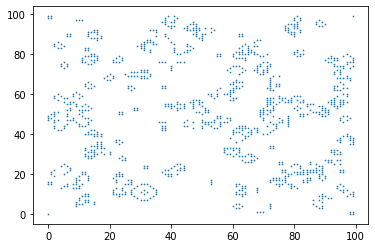

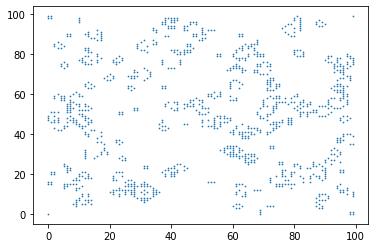

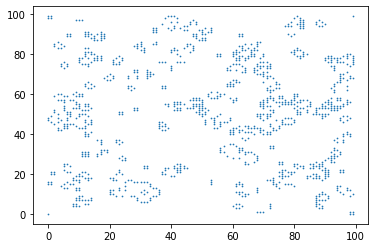

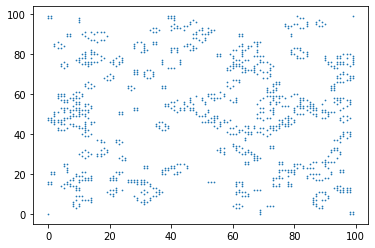

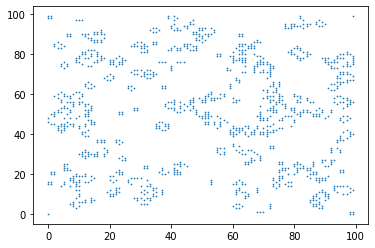

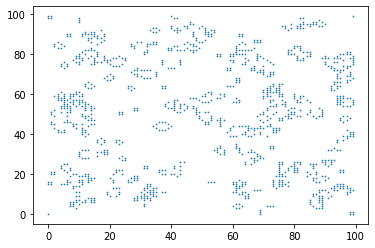

In [ ]:
def one_shot(arr):
    fig, ax = plt.subplots()

    x, y = np.argwhere(arr == 1).T
    ax.scatter(x, y, s = 0.5)
    #ax.set(xlabel='X', ylabel='x^{}'.format(power),title='Powers of x')
    fig.canvas.draw()
    #plt.show()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

imageio.mimsave('./powers.gif', [one_shot(arr) for arr in list(islice(part2(grid), 50, 100))], fps=3)